In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

train_data = pd.read_csv('train.csv', index_col='PassengerId')
test_data = pd.read_csv('test.csv', index_col='PassengerId')

In [2]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000189309224A8>,
      dtype=object)

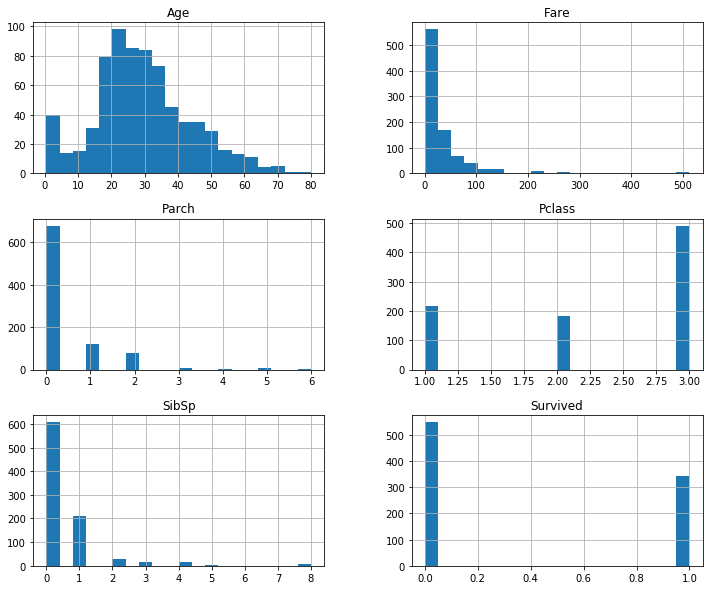

In [4]:
train_data.hist(bins=20, figsize=(12, 10))

In [5]:
train_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [6]:
train_data.corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

In [7]:
X, y = train_data.drop('Survived', axis=1).copy(), train_data['Survived'].copy()
X_test = test_data.copy()

In [8]:
# for x in [X, X_test]:
#     x['Relatives'] = x['Parch'] + x['SibSp']
#     x.drop(['Parch', 'SibSp'], axis=1, inplace=True)

In [9]:
# for df in [X, X_test]:
#     df['Is_male'] = df['Sex'].replace({'male': 1, 'female': 0})
#     df.drop('Sex', axis=1, inplace=True)

In [10]:
# for x in [X, X_test]:
#     x['Embarked'] = x['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

In [11]:
for x in [X, X_test]:
#    x['Cabin'] = x['Cabin'].str[:1]
#    x['Cabin'] = x['Cabin'].replace({np.nan : '0'})
#                                      , 'A': 1, 'B': 2, 
#                                      'C': 3, 'D': 4, 'E': 5,
#                                      'F': 6, 'G': 7, 'T': 8}).astype(int)
    x['Cabin'] = x['Cabin'].isnull().astype(int)
X_test['Cabin'].unique()

array([1, 0], dtype=int64)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       891 non-null int32
Embarked    889 non-null object
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 73.1+ KB


In [13]:
for x in [X, X_test]:
    x['Name_title'] = x['Name'].str.extract('(\w+)(?:\.)')
    x['Name_title'].replace(['Dr', 'Rev', 'Mlle', 
                         'Major', 'Col', 'Capt',
                         'Jonkheer', 'Mme', 'Lady', 
                         'Countess', 'Don', 'Sir', 'Dona'], 'Dif', inplace=True)
    x['Name_title'].replace('Ms', 'Miss', inplace=True)
#     x['Name_title'].replace({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dif': 4}, inplace=True)
    x.drop('Name', axis=1, inplace=True)
    
# X['Name_title'].value_counts()

In [14]:
# for x in [X, X_test]:
#     x['Fare_cat'] = np.ceil(x['Fare'] / 100) # limit the number of income categories and have discreate values
#     x['Fare_cat'].where(x['Fare_cat'] < 4, 4.0 , inplace=True)
#     x.drop('Fare', axis=1, inplace=True)
# X['Fare_cat'].value_counts()

# for x in [X, X_test]:
#     x['Age_group'] = np.ceil(x['Age'] / 10) # limit the number of income categories and have discreate values
#     x['Age_group'].where(x['Age_group'] < 6, 6.0 , inplace=True)
#     x.drop('Age', axis=1, inplace=True)
# X['Age_group'].value_counts()

In [15]:
num_attribs = [attrib for attrib in X if X[attrib].dtype in ['int32', 'int64', 'float64']]
cat_attribs = [attrib for attrib in X if X[attrib].dtype == 'object' and X[attrib].nunique()<10]

In [16]:
print('Numeric Attributes:\n', num_attribs)
print('Categorical Attributes:\n', cat_attribs)

Numeric Attributes:
 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin']
Categorical Attributes:
 ['Sex', 'Embarked', 'Name_title']


In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
            self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipe = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


cat_pipe = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('imputer', MostFrequentImputer()),
    ('encoder', OneHotEncoder()),
])

In [19]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipe),
    ('cat_pipeline', cat_pipe),
])

X_prep = full_pipeline.fit_transform(X)

In [20]:
X_prep.shape

(891, 16)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
score = cross_val_score(sgd_clf, X_prep, y, cv=10, scoring='accuracy') # array([0.74074074, 0.80808081, 0.85185185])
score.mean()

C:\Users\Arijit Aakriti\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.765296788105777

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
score = cross_val_score(forest_clf, X_prep, y, cv=10, scoring='accuracy')
score.mean()

C:\Users\Arijit Aakriti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Arijit Aakriti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Arijit Aakriti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Arijit Aakriti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Arijit Aakriti\Anaconda3\lib\si

0.8182487799341732

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
score = cross_val_score(knn_clf, X_prep, y, cv=10, scoring='accuracy') # array([0.78787879, 0.83501684, 0.81481481])
score.mean()

0.8215560095335375

In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
score = cross_val_score(log_reg, X_prep, y, cv=10, scoring='accuracy') # array([0.81818182, 0.81481481, 0.84511785])
score.mean()

C:\Users\Arijit Aakriti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.827200658268074

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'solver': ['liblinear', 'newton-cg'], 'max_iter': [100, 50]},
    {'penalty': ['l1', 'l2']}
]

grid_search = GridSearchCV(log_reg, param_grid, scoring='accuracy', n_jobs=-1, cv=3)
grid_search.fit(X_prep, y)

In [26]:
grid_search.best_params_

{'max_iter': 100, 'solver': 'liblinear'}

In [27]:
final_model = grid_search.best_estimator_

cross_val_score(final_model, X_prep, y, cv=3, scoring='accuracy') # array([0.81481481, 0.82154882, 0.84511785])

array([0.81818182, 0.81818182, 0.84511785])

In [28]:
test_prep = full_pipeline.transform(X_test)

In [29]:
pred = final_model.predict(test_prep)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [30]:
test_data.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [31]:
submission = pd.DataFrame({
    "PassengerId": test_data.index,
    "Survived": pred
})

submission.to_csv('submission.csv', index=False)

In [32]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Last rank = 2461 / 17236